Market Mix Modeling (MMM) is a technique which helps in quantifying the impact of several marketing
inputs on sales or Market Share. The purpose of using MMM is to understand how much each marketing 
input contributes to sales, and how much to spend on each marketing input.

MMM helps in the ascertaining the effectiveness of each marketing input in terms of 
Return on Investment. In other words, a marketing input with higher return on Investment (ROI) 
is more effective as a medium than a marketing input with a lower ROI.

MMM uses the Regression technique and the analysis performed through Regression is further used 
for extracting key information/insights.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/advertisingcsv/Advertising.csv


In [3]:
promo = pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")

In [4]:
promo.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [5]:
promo=promo[['TV','Radio','Newspaper','Sales']]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

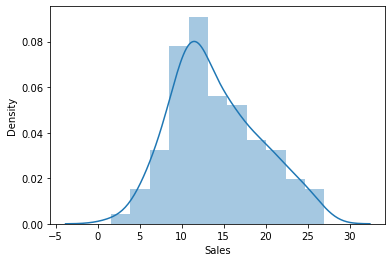

In [6]:
sns.distplot(promo['Sales'])

In [7]:
## Let's See the Correlation between Sales and each Channel
promo.corr()['Sales']

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

<AxesSubplot:>

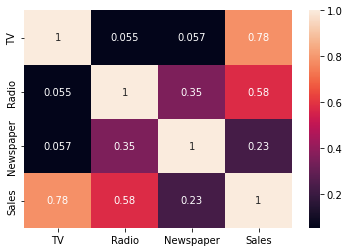

In [8]:
sns.heatmap(promo.corr(),annot=True)

### Seems TV and Radio are highly correlated with Sales meaning we will have higher impact by these 
* feature to drive the impact...

### We can also treat outlier and other transformation to make features normalised one

In [9]:
promo.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TV'>

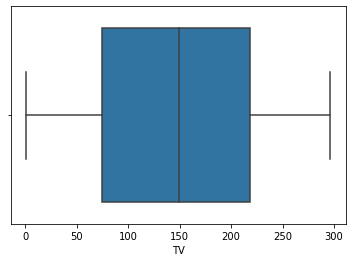

In [10]:
sns.boxplot(promo['TV'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Radio'>

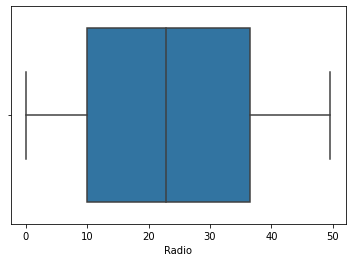

In [11]:
sns.boxplot(promo['Radio'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Newspaper'>

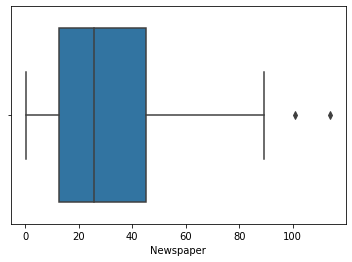

In [12]:
### There is outlier in Newspaper
sns.boxplot(promo['Newspaper'])

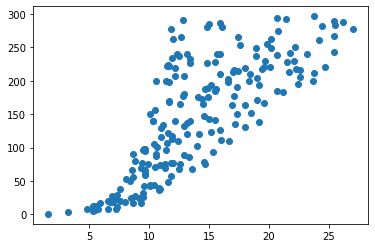

In [13]:
plt.scatter(promo['Sales'],promo['TV'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales'>

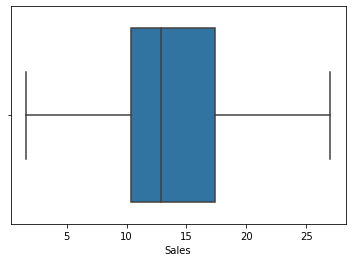

In [14]:
sns.boxplot(promo['Sales'])

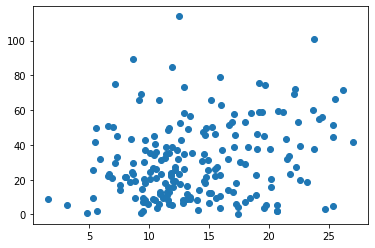

In [15]:
## Newspaper does not seem to be correlated with dependent variable
plt.scatter(promo['Sales'],promo['Newspaper'])

In [16]:
q1= np.percentile(promo['Newspaper'],0.25)
q3= np.percentile(promo['Newspaper'],0.75)
iqr = q3 - q1
lar = q1 - 1.5 * iqr
uar = q3 + 1.5 * iqr

In [17]:
newspaper_median = np.median(promo['Newspaper'])
newspaper_median

25.75

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Newspaper'>

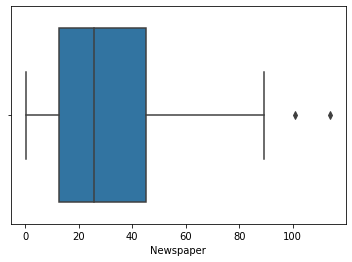

In [18]:
sns.boxplot(promo['Newspaper'])

In [19]:
promo['Newspaper'] = promo['Newspaper'].apply(lambda x: 25.75 if x>= 95 else x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Newspaper'>

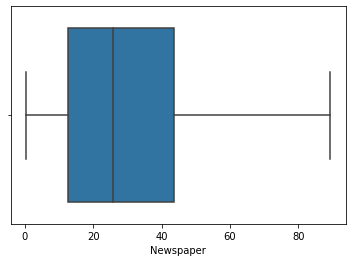

In [20]:
# WE DOn't have outlier now 
sns.boxplot(promo['Newspaper'])

In [21]:
y = promo['Sales']
x=promo[['TV','Radio','Newspaper']]

In [22]:
promo.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [23]:
import statsmodels.formula.api as sm

In [24]:
model = sm.ols(formula = "Sales~TV+Radio+Newspaper",data=promo).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           1.57e-96
Time:                        10:39:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9424      0.316      9.325      0.000       2.320       3.565
TV             0.0458      0.001     32.818      0.000       0.043       0.049
Radio          0.1886      0.009     21.989      0.000       0.172       0.205
Newspaper     -0.0012      0.006     -0.191      0.848      -0.014       0.011
==============================================================================
Omnibus:                       60.387   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.276
Skew:                          -1.326   Prob(JB):                     1.41e-33
Kurtosis:                       6.334   Cond. No.                         459.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
promo['predicted_sales_m'] = model.predict(x)

In [27]:
Intercept = 2.9424
beta1 = 0.0458
beta2  = 0.1886
beta3 =-0.0012

In [28]:
promo.head(2)

,TV,Radio,Newspaper,Sales,predicted_sales_m
0,230.1,37.8,69.2,22.1,20.517073
1,44.5,39.3,45.1,10.4,12.335092


In [29]:
promo['predicted_sales_c'] = Intercept + beta1*promo['TV']+ beta2 * promo['Radio']\
                + beta3*promo['Newspaper']

In [30]:
promo['base_sales']= Intercept

In [31]:
promo['error']=promo['Sales'] - promo['predicted_sales_m'] 

In [32]:
promo.sum()

TV                   2.940850e+04
Radio                4.652800e+03
Newspaper            5.947400e+03
Sales                2.804500e+03
predicted_sales_m    2.804500e+03
predicted_sales_c    2.805771e+03
base_sales           5.884800e+02
error                1.293188e-12
dtype: float64

In [33]:
promo['Impact_TV']= beta1 * promo['TV']
promo['Impact_radio']=beta2 * promo['Radio']
promo['Impact_newspaper']=beta3 * promo['Newspaper']

In [34]:
promo.sum()

TV                   2.940850e+04
Radio                4.652800e+03
Newspaper            5.947400e+03
Sales                2.804500e+03
predicted_sales_m    2.804500e+03
predicted_sales_c    2.805771e+03
base_sales           5.884800e+02
error                1.293188e-12
Impact_TV            1.346909e+03
Impact_radio         8.775181e+02
Impact_newspaper    -7.136880e+00
dtype: float64

#### Volume based TV channel Impact in Percentage is as below

In [35]:
total_sales = promo['Sales'].sum()
prct_tv_impact = ((total_sales- (promo['base_sales'].sum() + 
                                promo['Impact_radio'].sum() + 
                                promo['Impact_newspaper'].sum()))/ total_sales)*100
prct_tv_impact

47.9814155821002

#### Volume based Radio channel Impact in Percentage is as below

In [36]:
prct_radio_impact =( (total_sales- (promo['base_sales'].sum() +
                                   promo['Impact_TV'].sum()  + 
                                   promo['Impact_newspaper'].sum()))/ total_sales)*100
prct_radio_impact

31.244342307006605

#### Volume based NewsPaper channel Impact in Percentage is as below

In [37]:
prct_newspaper_impact = ((total_sales- (promo['base_sales'].sum()+ 
                                       promo['Impact_TV'].sum() + 
                                       promo['Impact_radio'].sum()))/ total_sales)*100
prct_newspaper_impact

-0.29978177928328215

### Volume based bASE Impact in Percentage is as below EVEN THough there is no promotion what % of sales is occuring

In [38]:
prct_base_impact = ((total_sales- (promo['Impact_newspaper'].sum()+ 
                                       promo['Impact_TV'].sum() + 
                                       promo['Impact_radio'].sum()))/ total_sales)*100
prct_base_impact

20.938117311463717

In [39]:
Total_Contribution =  prct_base_impact + prct_tv_impact + prct_radio_impact + prct_newspaper_impact
Total_Contribution

99.86409342128724

In [40]:
print("TV Contribution is {}".format(prct_tv_impact))
print("Radio Contribution is {}".format(prct_radio_impact))
print("Newspaper Contribution is {}".format(prct_newspaper_impact))
print("Base Sales Contribution is {}".format(prct_base_impact))

TV Contribution is 47.9814155821002
Radio Contribution is 31.244342307006605
Newspaper Contribution is -0.29978177928328215
Base Sales Contribution is 20.938117311463717


### Hence we can conclude that TV is most impactful channel followed with Radio and Business acumen 
*** should stop investing on Newspaper as there is negative impact by this channel.
